Days

<>:4: SyntaxWarning: invalid escape sequence '\d'
<>:4: SyntaxWarning: invalid escape sequence '\d'
C:\Users\hp\AppData\Local\Temp\ipykernel_12096\2563606016.py:4: SyntaxWarning: invalid escape sequence '\d'
  df = pd.read_csv('D:\days.csv', sep=';', header=None,


Basic Statistics:
count    71383.000000
mean        82.200006
std         77.113175
min          0.000000
25%         20.000000
50%         62.000000
75%        127.000000
max        528.000000
Name: Sunspot_Number, dtype: float64


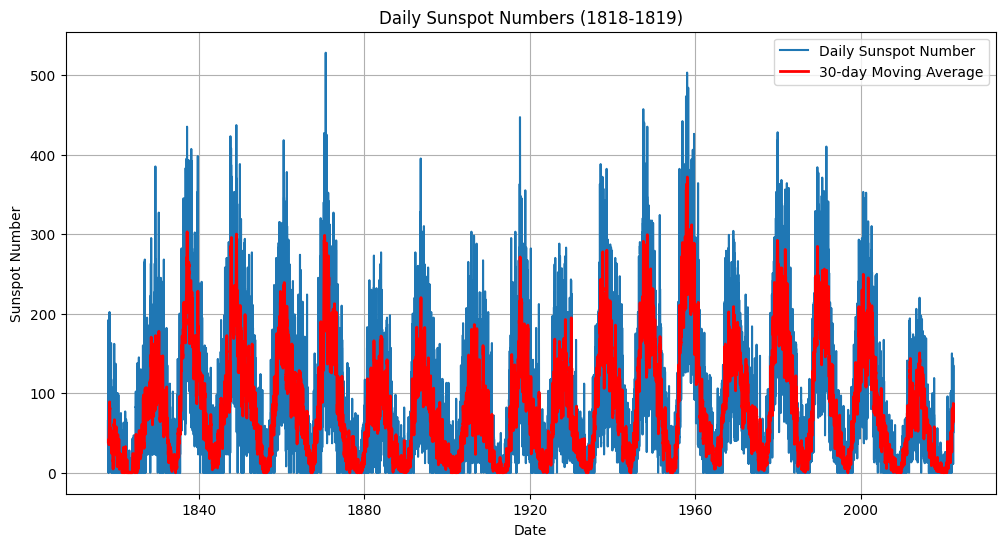


Top 5 days with highest sunspot activity:
            Sunspot_Number  Std_Dev
Date                               
1870-08-26             528     25.8
1870-08-27             520     25.6
1870-08-29             518     25.6
1957-12-24             503     15.1
1957-12-25             503     15.1

Monthly Averages:
Date
1818-01-31    58.125000
1818-02-28    37.428571
1818-03-31    42.357143
1818-04-30    57.523810
1818-05-31    88.480000
                ...    
2021-12-31    67.451613
2022-01-31    53.967742
2022-02-28    59.678571
2022-03-31    78.451613
2022-04-30    84.066667
Freq: ME, Name: Sunspot_Number, Length: 2452, dtype: float64


C:\Users\hp\AppData\Local\Temp\ipykernel_12096\2563606016.py:37: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg = df.resample('M')['Sunspot_Number'].mean()


In [15]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('D:\days.csv', sep=';', header=None, 
                 names=['Year', 'Month', 'Day', 'Fractional_Year', 'Sunspot_Number', 
                        'Std_Dev', 'Observations', 'Indicator'])

df['Date'] = pd.to_datetime(df[['Year', 'Month', 'Day']])

# Date as index
df.set_index('Date', inplace=True)
df = df[df['Sunspot_Number'] != -1]
print("Basic Statistics:")
print(df['Sunspot_Number'].describe())

# Plotting sunspot over time
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Sunspot_Number'])
plt.title('Daily Sunspot Numbers (1818-1819)')
plt.xlabel('Date')
plt.ylabel('Sunspot Number')
plt.grid(True)

# Calculating average for 30 days
df['MA_30'] = df['Sunspot_Number'].rolling(window=30).mean()
plt.plot(df.index, df['MA_30'], color='red', linewidth=2)

plt.legend(['Daily Sunspot Number', '30-day Moving Average'])
plt.show()

# Highest sunspot
top_days = df.nlargest(5, 'Sunspot_Number')
print("\nTop 5 days with highest sunspot activity:")
print(top_days[['Sunspot_Number', 'Std_Dev']])

# Monthly Averages
monthly_avg = df.resample('M')['Sunspot_Number'].mean()
print("\nMonthly Averages:")
print(monthly_avg)

Months

<>:7: SyntaxWarning: invalid escape sequence '\m'
<>:7: SyntaxWarning: invalid escape sequence '\m'
C:\Users\hp\AppData\Local\Temp\ipykernel_12096\485536097.py:7: SyntaxWarning: invalid escape sequence '\m'
  data = pd.read_csv('D:\months.csv', sep=';', header=None)
23:46:43 - cmdstanpy - INFO - Chain [1] start processing
23:46:45 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


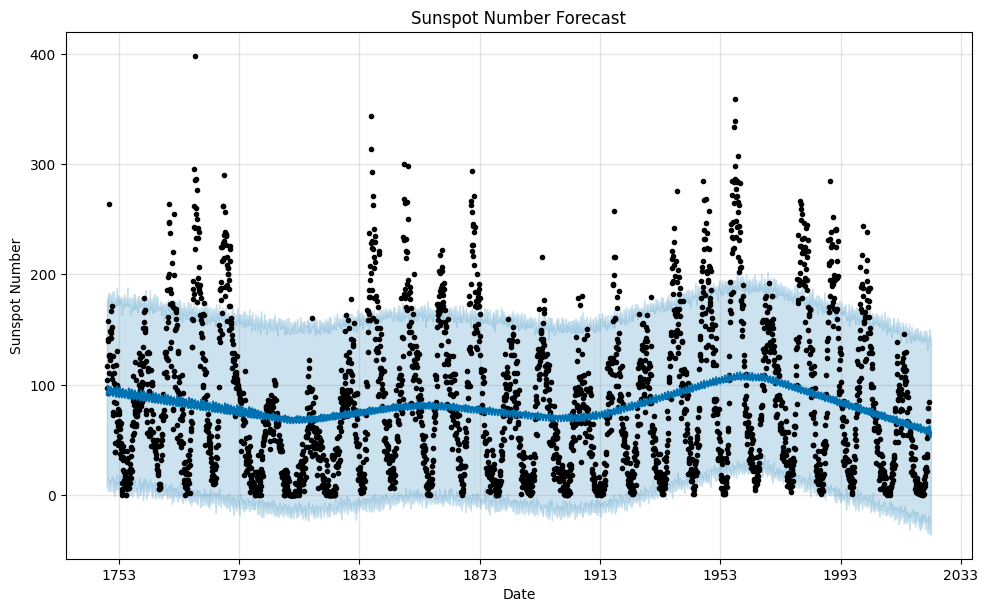

MAE: 53.32065959224137
MAPE: 6623843691256298.0
R2 Score: 0.065090137375027


In [16]:
from prophet import Prophet
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score
import matplotlib.pyplot as plt

# Dataset
data = pd.read_csv('D:\months.csv', sep=';', header=None)
data.columns = ['Year', 'Month', 'Fractional Year', 'Sunspot Number', 'Placeholder1', 'Placeholder2', 'Quality']

# Data Preparation
data['Date'] = pd.to_datetime(data['Year'].astype(str) + '-' + data['Month'].astype(str))
df = data[['Date', 'Sunspot Number']].rename(columns={'Date': 'ds', 'Sunspot Number': 'y'})

# Prophet model
model = Prophet()
model.fit(df)
future = model.make_future_dataframe(periods=9, freq='M')
forecast = model.predict(future)

# Forecasting
fig = model.plot(forecast)
plt.title('Sunspot Number Forecast')
plt.xlabel('Date')
plt.ylabel('Sunspot Number')
plt.show()

# Model Evaluation
y_true = df['y']
y_pred = forecast['yhat'][:len(y_true)]
mae = mean_absolute_error(y_true, y_pred)
mape = mean_absolute_percentage_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)

print(f'MAE: {mae}')
print(f'MAPE: {mape}')
print(f'R2 Score: {r2}')

Years

Min date: 1900-01-01 00:00:00, Max date: 2020-01-01 00:00:00
          ds     y
0 1900-01-01  20.2
1 1900-01-01  15.7
2 1902-01-01   4.6
3 1902-01-01   8.5
4 1904-01-01  40.8
            ds     y
117 2016-01-01  39.8
118 2018-01-01  21.7
119 2018-01-01   7.0
120 2020-01-01   3.6
121 2020-01-01   8.8


23:46:51 - cmdstanpy - INFO - Chain [1] start processing
23:46:52 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


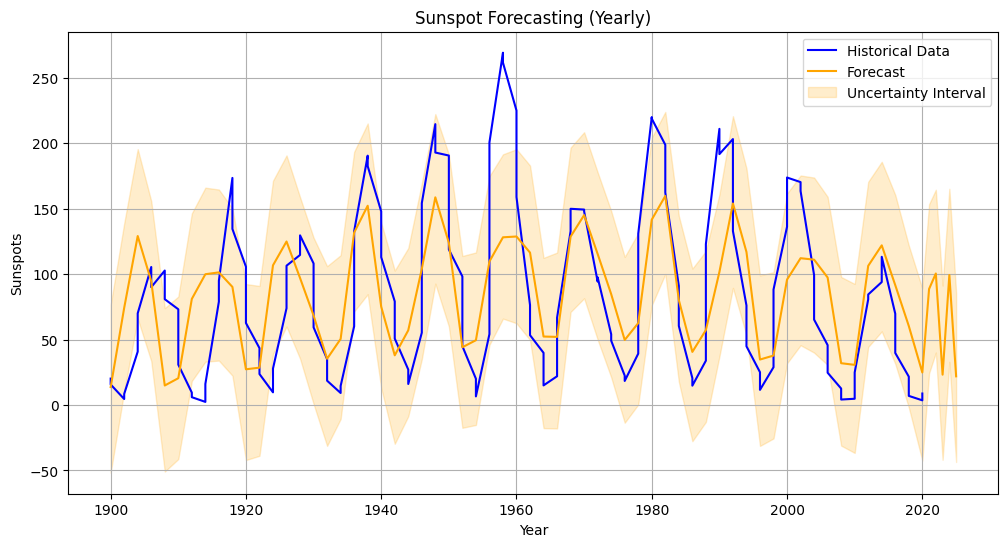

Length of y_true: 122, Length of y_pred: 61
Error: Length mismatch between true and predicted values.


In [17]:
import pandas as pd
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score
import matplotlib.pyplot as plt
from datetime import datetime

# Yearly data
def preprocess_yearly_data(filepath):
    """Load and preprocess yearly sunspot data."""
    df = pd.read_csv(filepath, sep=';', header=None)
    df.columns = ['Year', 'Sunspots', 'Deviation', 'Observations', 'Indicator']
    df['Year'] = df['Year'].astype(float).round().astype(int)
    valid_years = (df['Year'] >= 1700) & (df['Year'] <= 2100)
    df = df[valid_years]

    # Converting Year to datetime
    df['ds'] = df['Year'].apply(lambda x: datetime(x, 1, 1))
    df = df[(df['ds'] >= datetime(1900, 1, 1)) & (df['ds'] <= datetime(2020, 1, 1))]
    df.reset_index(drop=True, inplace=True)

    # Keeping only relevant columns
    df = df[['ds', 'Sunspots']]
    df.rename(columns={'Sunspots': 'y'}, inplace=True)
    df = df[df['y'] >= 0]
    return df

# Training and predicting
def train_and_predict_yearly(df, periods, growth='linear', changepoint_scale=0.05):
    """Train and predict using Prophet for yearly data."""
    model = Prophet(growth=growth, changepoint_prior_scale=changepoint_scale)
    model.add_seasonality(name='yearly', period=11, fourier_order=3)
    model.fit(df)
    
    # Make Dataframe
    future = model.make_future_dataframe(periods=periods, freq='Y')
    forecast = model.predict(future)
    return model, forecast

# Results
def plot_forecast(df, forecast):
    """Plot historical data and predictions."""
    plt.figure(figsize=(12, 6))
    plt.plot(df['ds'], df['y'], label='Historical Data', color='blue')
    plt.plot(forecast['ds'], forecast['yhat'], label='Forecast', color='orange')
    plt.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='orange', alpha=0.2, label='Uncertainty Interval')
    plt.title("Sunspot Forecasting (Yearly)")
    plt.xlabel('Year')
    plt.ylabel('Sunspots')
    plt.legend()
    plt.grid()
    plt.show()

def evaluate_model(df, forecast):
    # Historical dates
    historical_forecast = forecast[forecast['ds'].isin(df['ds'])]

    # Predicted values
    y_true = df['y'].values
    y_pred = historical_forecast['yhat'].values
    print(f"Length of y_true: {len(y_true)}, Length of y_pred: {len(y_pred)}")
    if len(y_true) != len(y_pred):
        print("Error: Length mismatch between true and predicted values.")
        return None

    # Metrics
    mae = mean_absolute_error(y_true, y_pred)
    mape = mean_absolute_percentage_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)

    print(f"MAE: {mae:.2f}, MAPE: {mape:.2%}, R2: {r2:.2f}")
    return mae, mape, r2

if __name__ == "__main__":
    filepath = r"D:\yearly.csv"
    df = preprocess_yearly_data(filepath)
    
    # Preprocessed data
    print(f"Min date: {df['ds'].min()}, Max date: {df['ds'].max()}")
    print(df.head())
    print(df.tail())
    # Prediction period
    periods = 5
    # Training and forecasting
    model, forecast = train_and_predict_yearly(df, periods, growth='linear', changepoint_scale=0.1)
    
    # Results
    plot_forecast(df, forecast)
    # Model Evaluation
    evaluate_model(df, forecast)
